# Investigating performances in BigDFT code

In this page we will inspect how to access and understand the information
about the performances of the different building-blocks of a run with BigDFT.
First of all, let us notice that, together with the usual logfile information,
a file named "time.yaml" is also present next to the run directory.
If the run has a naming id called, say, <run_id> the file might be called 
"time-<run_id>.yaml". For input files which activate data output, such file might be present in the 
"data/" or "data-<run_id>/" directory.

Let us load the data associated to this output file.
The python module which is associated to this part is in the futile python suite.
Of course the bigdft python environment has to be loaded.

This excercise can be ran either in the "inline" mode of the notebook, or in the traditional mode with matplotlib widgets. At the end of the notebook the user is asked to perform an exercise with such mode enabled.

In [1]:
#you may avoid the following line in a traditional script (see exercise at the end)
%matplotlib inline
from futile import Time


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


The time analysis can be defined as an instance of the TimeData class:

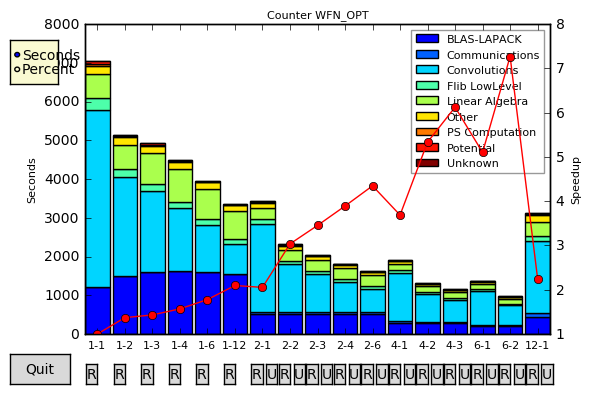

In [2]:
timetest=Time.TimeData('testfiles/time-B80.yaml',fontsize=8)

As we might see, the time spent into the run of the "WFN_OPT" category
(which is associated to the wavefunction optimization) is splitted
into different subcategories. 
The above plot is interactive in a normal window.
There are several buttons and possiblities to interact with.

* The radio button "Seconds" or "Percent" allows to choose between a bar plot based between seconds or percentage of walltime;


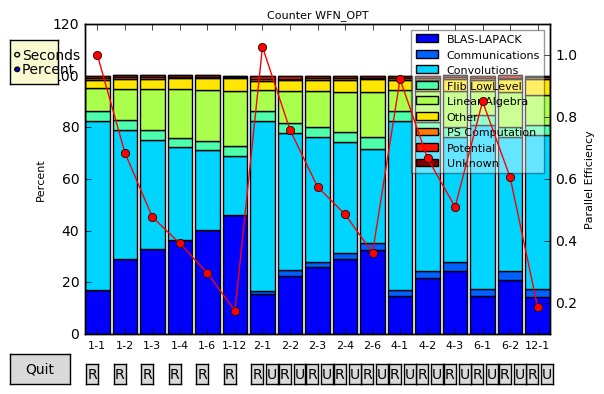

In [3]:
timetest=Time.TimeData('testfiles/time-B80.yaml',fontsize=8,plottype='Percent')

* By clicking on the area of one class we highlight the contributions
of the subcategories belonging to each class. By clicking on the area
related to the convolutions we find for example:

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


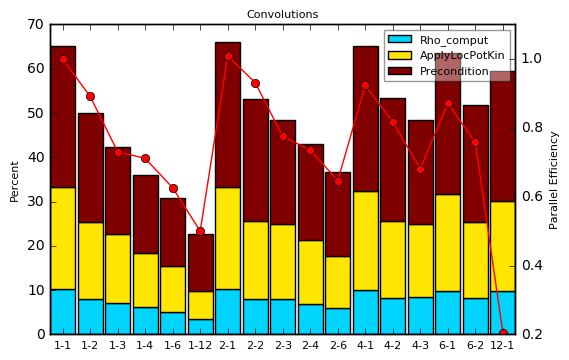

In [4]:
timetest.inspect_category('Convolutions')

And we can toggle between seconds and percent by clicking on the
Master figure (press the "Home" key to hihglight the window).

* In the master window there are also (when available) a "R" button for each of
the bar histograms. Clicking this button would provide the repartition of 
the run walltime among the different level of routines:

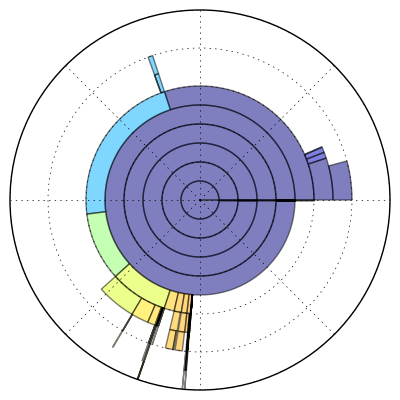

In [5]:
timetest.routines_plot(0)

By passing the pointer over each region we might see to which routine it
corresponds, and the corresponding parents. Also clicking on each of the
region would reset the plot starting from the selected routine as basic level.
Right click is enough to reset the plot to lowest level.

* The other button "U" in the master plot, close to each bar histogram, represents
the load balancing of each of the classes of the run with respect to the average
over the whole pool of MPI tasks, ordered by hostnames:

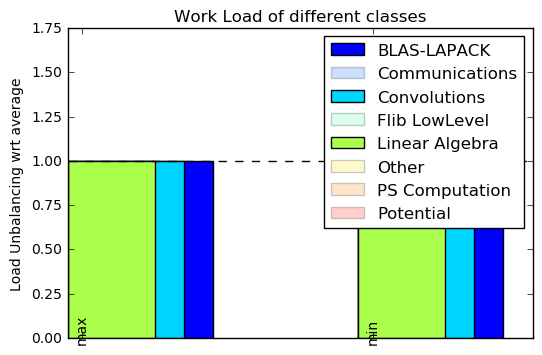

In [6]:
timetest.workload_plot(6)

Clicking over each of the classes in the key frame would hide/show each
of the histograms. This is helpful in understanding for which classes a
load unbalancing might occur.

* The Button "Quit" in the master figure closes all the opened figures.

## Excercise with the normal matplotlib widgets
Repeat now the same test, by producing the same informations, without the inline mode.
To do that it is enough to follow the above described instruction and run _only_ the following command:

In [1]:
#if this does not work restart the IPython kernel and reload Time module w/o matplotlib magics
%matplotlib qt
from futile import Time
Time.TimeData('testfiles/time-B80.yaml').show()


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Good bye!
